In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Input, Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model

In [2]:
arr = np.load('sample_mar_array1.npy')

df = pd.DataFrame(arr, columns = ['frames','time','ear','mar'])
print(df.shape)
df.head()

(1598, 4)


,frames,time,ear,mar
0,1.0,1.651189e+09,3.237318,23.645987
1,2.0,1.651189e+09,3.240060,24.306306
2,3.0,1.651189e+09,3.065426,23.313482
3,4.0,1.651189e+09,2.982960,23.914424
4,5.0,1.651189e+09,3.016040,24.251229


In [3]:
df.describe()

,frames,time,ear,mar
count,1598.00000,1.598000e+03,1598.000000,1598.000000
mean,799.50000,1.651189e+09,3.620443,27.716838
std,461.44718,2.007180e+01,0.706880,9.087217
min,1.00000,1.651189e+09,1.942090,9.923452
25%,400.25000,1.651189e+09,3.071967,23.004140
50%,799.50000,1.651189e+09,3.575720,24.153500
75%,1198.75000,1.651189e+09,4.117151,25.997853
max,1598.00000,1.651189e+09,6.297306,55.391960


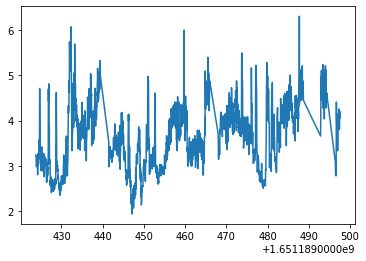

In [4]:
plt.plot(df['time'],df['ear'])

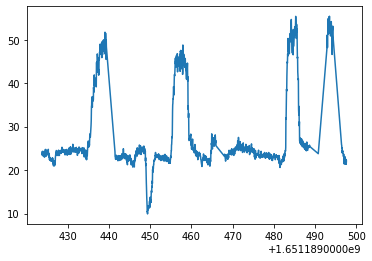

In [5]:
plt.plot(df['time'],df['mar'])

In [6]:
df['time'] = pd.to_datetime(df['time'])
print(df.shape)
df.head()

(1598, 4)


,frames,time,ear,mar
0,1.0,1970-01-01 00:00:01.651189423,3.237318,23.645987
1,2.0,1970-01-01 00:00:01.651189423,3.240060,24.306306
2,3.0,1970-01-01 00:00:01.651189423,3.065426,23.313482
3,4.0,1970-01-01 00:00:01.651189423,2.982960,23.914424
4,5.0,1970-01-01 00:00:01.651189423,3.016040,24.251229


In [7]:
train, test = df.loc[df['frames'] <= 1000], df.loc[df['frames'] > 1000]
print(train)

     frames                          time       ear        mar
0       1.0 1970-01-01 00:00:01.651189423  3.237318  23.645987
1       2.0 1970-01-01 00:00:01.651189423  3.240060  24.306306
2       3.0 1970-01-01 00:00:01.651189423  3.065426  23.313482
3       4.0 1970-01-01 00:00:01.651189423  2.982960  23.914424
4       5.0 1970-01-01 00:00:01.651189423  3.016040  24.251229
..      ...                           ...       ...        ...
995   996.0 1970-01-01 00:00:01.651189463  3.579231  22.686643
996   997.0 1970-01-01 00:00:01.651189463  3.609040  22.532249
997   998.0 1970-01-01 00:00:01.651189463  3.420470  22.504444
998   999.0 1970-01-01 00:00:01.651189463  3.345175  22.836672
999  1000.0 1970-01-01 00:00:01.651189463  3.304075  23.000000

[1000 rows x 4 columns]


In [8]:
from sklearn.preprocessing import StandardScaler

mar = np.array(train['mar'])
mar = mar.reshape(-1,1)

scaler = StandardScaler()
scaler = scaler.fit(mar)

testmar = np.array(test['mar'])
testmar = testmar.reshape(-1,1)
train['mar'] = scaler.transform(mar)
test['mar'] = scaler.transform(testmar)

C:\Users\KSGS\AppData\Local\Temp/ipykernel_28512/1070944766.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['mar'] = scaler.transform(mar)
C:\Users\KSGS\AppData\Local\Temp/ipykernel_28512/1070944766.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['mar'] = scaler.transform(testmar)


In [9]:
test

,frames,time,ear,mar
1000,1001.0,1970-01-01 00:00:01.651189463,3.720734,-0.578959
1001,1002.0,1970-01-01 00:00:01.651189463,3.433989,-0.558182
1002,1003.0,1970-01-01 00:00:01.651189463,3.627307,-0.562848
1003,1004.0,1970-01-01 00:00:01.651189463,3.541260,-0.650346
1004,1005.0,1970-01-01 00:00:01.651189463,3.550350,-0.647121
...,...,...,...,...
1593,1594.0,1970-01-01 00:00:01.651189497,3.815817,-0.686847
1594,1595.0,1970-01-01 00:00:01.651189497,3.817651,-0.653633
1595,1596.0,1970-01-01 00:00:01.651189497,4.199451,-0.564310
1596,1597.0,1970-01-01 00:00:01.651189497,4.150598,-0.694296


In [10]:
train

,frames,time,ear,mar
0,1.0,1970-01-01 00:00:01.651189423,3.237318,-0.428472
1,2.0,1970-01-01 00:00:01.651189423,3.240060,-0.352771
2,3.0,1970-01-01 00:00:01.651189423,3.065426,-0.466592
3,4.0,1970-01-01 00:00:01.651189423,2.982960,-0.397698
4,5.0,1970-01-01 00:00:01.651189423,3.016040,-0.359086
...,...,...,...,...
995,996.0,1970-01-01 00:00:01.651189463,3.579231,-0.538454
996,997.0,1970-01-01 00:00:01.651189463,3.609040,-0.556154
997,998.0,1970-01-01 00:00:01.651189463,3.420470,-0.559342
998,999.0,1970-01-01 00:00:01.651189463,3.345175,-0.521254


In [11]:
seq_size = 200

def to_sequences(x, y, seq_size=1):
    x_values = []
    y_values = []

    for i in range(len(x)-seq_size):
        #print(i)
        x_values.append(x.iloc[i:(i+seq_size)].values)
        y_values.append(y.iloc[i+seq_size])
        
    return np.array(x_values), np.array(y_values)

trainX, trainY = to_sequences(train[['mar']], train['mar'], seq_size)
testX, testY = to_sequences(test[['mar']], test['mar'], seq_size)


In [12]:
model = Sequential()
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(rate=0.2))

model.add(RepeatVector(trainX.shape[1]))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(trainX.shape[2])))
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 200, 128)         0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 200, 128)          131584    
                                                                 
 dropout_1 (Dropout)         (None, 200, 128)          0         
                                                                 
 time_distributed (TimeDistr  (None, 200, 1)           129       
 ibuted)                                                

Epoch 1/10
23/23 [==============================] - 10s 81ms/step - loss: 0.8214 - val_loss: 0.1346
Epoch 2/10
23/23 [==============================] - 1s 30ms/step - loss: 0.7934 - val_loss: 0.1171
Epoch 3/10
23/23 [==============================] - 1s 27ms/step - loss: 0.7929 - val_loss: 0.1262
Epoch 4/10
23/23 [==============================] - 1s 27ms/step - loss: 0.7914 - val_loss: 0.1451
Epoch 5/10
23/23 [==============================] - 1s 28ms/step - loss: 0.7916 - val_loss: 0.1223
Epoch 6/10
23/23 [==============================] - 1s 32ms/step - loss: 0.7915 - val_loss: 0.1481
Epoch 7/10
23/23 [==============================] - 1s 27ms/step - loss: 0.7917 - val_loss: 0.1417
Epoch 8/10
23/23 [==============================] - 1s 26ms/step - loss: 0.7907 - val_loss: 0.1311
Epoch 9/10
23/23 [==============================] - 1s 29ms/step - loss: 0.7919 - val_loss: 0.1544
Epoch 10/10
23/23 [==============================] - 1s 26ms/step - loss: 0.7899 - val_loss: 0.1255


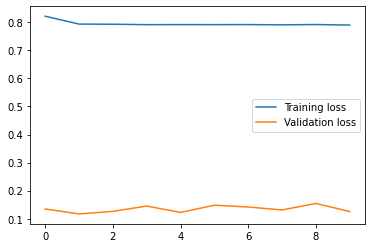

In [13]:
with tf.device('/GPU:0'):
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

(array([193.,  23.,   4.,   3.,   4.,   3.,   3.,   3.,   4.,   3.,   3.,
          4.,   3.,   3.,   3.,   3.,   3.,   4.,   6.,  63.,   3.,   3.,
          3.,   2.,   3.,   4.,   3.,   3.,   3.,  33.]),
 array([0.09228805, 0.1407892 , 0.18929036, 0.23779152, 0.28629268,
        0.33479383, 0.38329499, 0.43179615, 0.4802973 , 0.52879846,
        0.57729962, 0.62580077, 0.67430193, 0.72280309, 0.77130424,
        0.8198054 , 0.86830656, 0.91680771, 0.96530887, 1.01381003,
        1.06231118, 1.11081234, 1.1593135 , 1.20781465, 1.25631581,
        1.30481697, 1.35331812, 1.40181928, 1.45032044, 1.49882159,
        1.54732275]),
 <BarContainer object of 30 artists>)

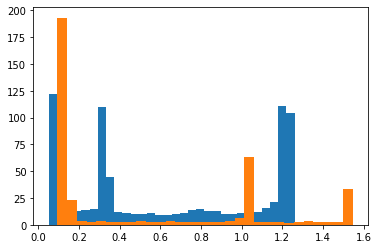

In [16]:
trainPredict = model.predict(trainX)
trainMAE = np.mean(np.abs(trainPredict - trainX), axis=1)
plt.hist(trainMAE, bins=30)
max_trainMAE = 0.3

testPredict = model.predict(testX)
testMAE = np.mean(np.abs(testPredict - testX), axis=1)
plt.hist(testMAE, bins=30)

In [23]:
#Capture all details in a DataFrame for easy plotting
anomaly_df = pd.DataFrame(test[seq_size:])
anomaly_df['testMAE'] = testMAE
anomaly_df['max_trainMAE'] = max_trainMAE
anomaly_df['anomaly'] = anomaly_df['testMAE'] > anomaly_df['max_trainMAE']
anomaly_df['mar'] = test[seq_size:]['mar']

<AxesSubplot:xlabel='mar', ylabel='testMAE'>

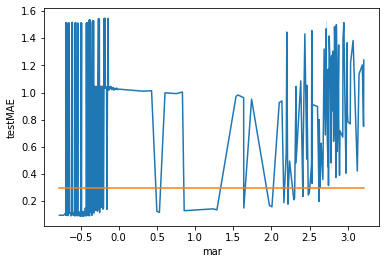

In [20]:
#Plot testMAE vs max_trainMAE
sns.lineplot(x=anomaly_df['mar'], y=anomaly_df['testMAE'])
sns.lineplot(x=anomaly_df['mar'], y=anomaly_df['max_trainMAE'])

ValueError: x and y must have same first dimension, but have shapes (398,) and (174, 1)

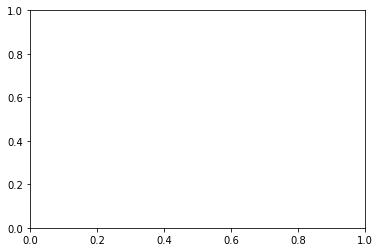

In [31]:
anomalies = anomaly_df.loc[anomaly_df['anomaly'] == True]

mar1 = np.array(anomalies['mar'])
mar1 = mar1.reshape(-1,1)

plt.plot(anomaly_df['frames'], scaler.inverse_transform(mar1))

In [ ]:


mar1 = np.array(anomalies['mar'])
mar1 = mar.reshape(-1,1)

#Plot anomalies
sns.lineplot(x=anomaly_df['mar'], y=scaler.inverse_transform(mar1))
sns.scatterplot(x=anomalies['mar'], y=scaler.inverse_transform(mar1), color='r')